In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="white", font_scale=0.9)

In [2]:
from sklearn.datasets import load_boston

dataset_boston = load_boston()
dataset = pd.DataFrame(dataset_boston.data, columns=dataset_boston.feature_names)
dataset['MEDV'] = dataset_boston.target

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
y = np.log(dataset['MEDV'])
X = dataset.drop('MEDV', axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# exclude CHAS as this is a categorical variable (by the river or not)
X_scaled = X.drop('CHAS', axis=1)
X_scaled = pd.DataFrame(sc.fit_transform(X_scaled), columns=X_scaled.columns.values)

#Add back in string columns
X_scaled['CHAS'] = X['CHAS']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [200, 500],
    "max_depth": [3, None],
    "max_features": [1, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False]}

model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.866218387146
{'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 200, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}


In [7]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [8]:
regressor.score(X_test, y_test)

0.74192626420473107

In [9]:
y_pred = regressor.predict(X_test)

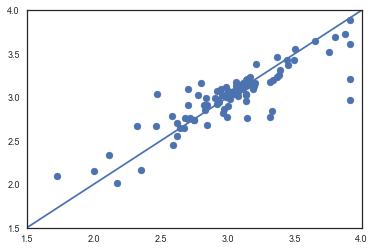

In [10]:
plt.scatter(x=y_test, y=y_pred)
plt.xlim([1.5,4])
plt.ylim([1.5,4])
plt.plot([1.5,4],[1.5,4])
plt.show()